<a href="https://colab.research.google.com/github/Mostafa1492/AMS-/blob/main/4_Task_sign_language_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [7]:
!kaggle datasets download -d ardamavi/sign-language-digits-dataset


 30% 5.00M/16.8M [00:00<00:00, 35.4MB/s]
100% 16.8M/16.8M [00:00<00:00, 86.6MB/s]


In [8]:
!kaggle datasets download -d ardamavi/sign-language-digits-dataset -p ardamavi/sign-language-digits-dataset



 59% 10.0M/16.8M [00:00<00:00, 102MB/s]
100% 16.8M/16.8M [00:00<00:00, 136MB/s]


In [9]:
!unzip /content/sign-language-digits-dataset.zip


Archive:  /content/sign-language-digits-dataset.zip
  inflating: Sign-language-digits-dataset/X.npy  
  inflating: Sign-language-digits-dataset/Y.npy  
  inflating: X.npy                   
  inflating: Y.npy                   


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [13]:
X = np.load('/content/X.npy')
y = np.load('/content/Y.npy')

In [14]:
X = X.reshape(-1,64,64,1)

print("X Shape:",X.shape)
print("Y Shape:",y.shape)

X Shape: (2062, 64, 64, 1)
Y Shape: (2062, 10)


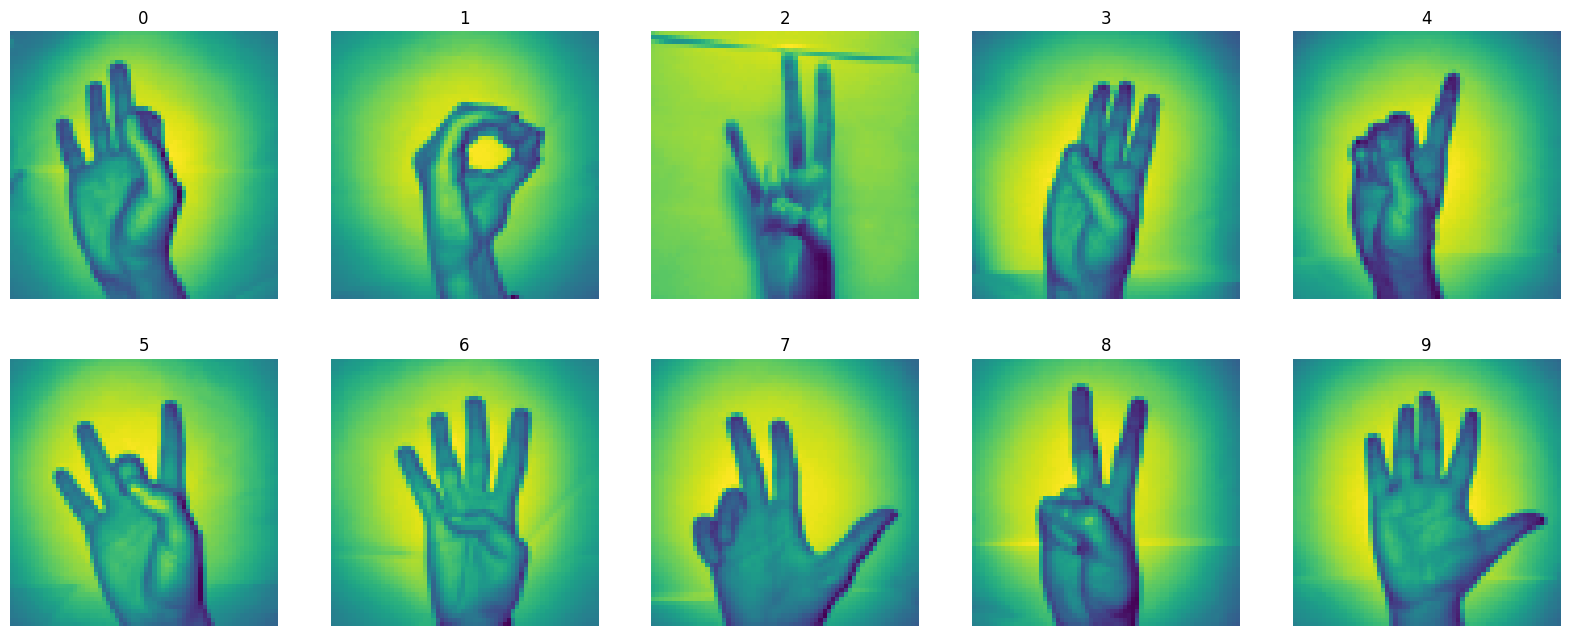

In [15]:
plt.figure(figsize=(20,6))

for i,j in enumerate([0,205,411,617,823,1030,1237,1444,1650,1858]):
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(top = 2, bottom = 1)
    plt.imshow(X[j].reshape(64,64))
    plt.title(np.argmax(y[j]))
    plt.axis('off')

In [16]:
list_y = []
list_y = [np.where(i == 1)[0][0] for i in y]
count = pd.Series(list_y).value_counts()
print(count)

5    208
3    207
6    207
9    207
2    206
4    206
7    206
8    206
1    205
0    204
dtype: int64


In [20]:
X_organized = np.concatenate((X[204:409,:],
                              X[822:1028,:],
                              X[1649:1855,:],
                              X[1443:1649,:],
                              X[1236:1443,:],
                              X[1855:2062,:],
                              X[615:822,:],
                              X[409:615,:],
                              X[1028:1236,:],
                              X[0:204,:]),axis = 0)

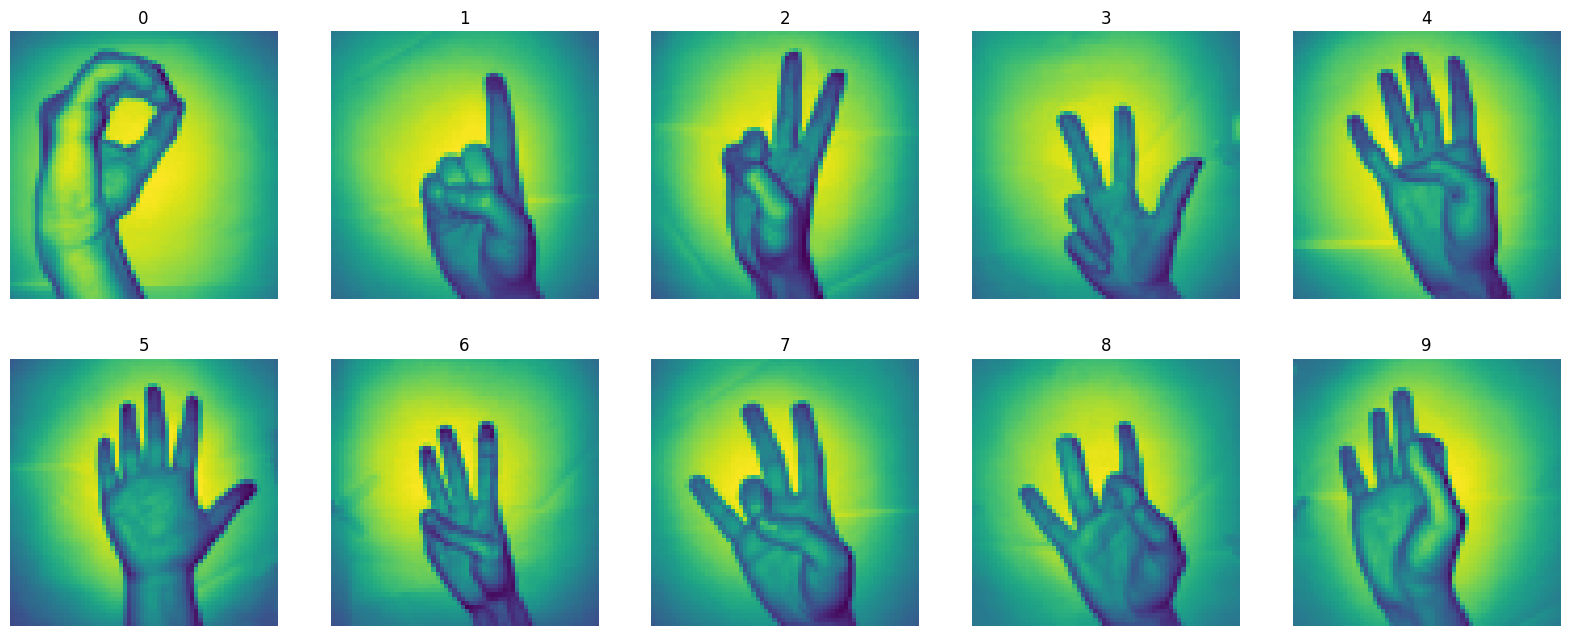

In [21]:
plt.figure(figsize=(20,6))

for i,j in enumerate([0,205,411,617,823,1030,1237,1444,1650,1858]):
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(top = 2, bottom = 1)
    plt.imshow(X_organized[j].reshape(64,64))
    plt.title(np.argmax(y[j]))
    plt.axis('off')

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_organized,y,test_size = 0.2,random_state = 42)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (1649, 64, 64, 1)
x_test shape: (413, 64, 64, 1)
y_train shape: (1649, 10)
y_test shape: (413, 10)


In [23]:
from keras.preprocessing.image import ImageDataGenerator


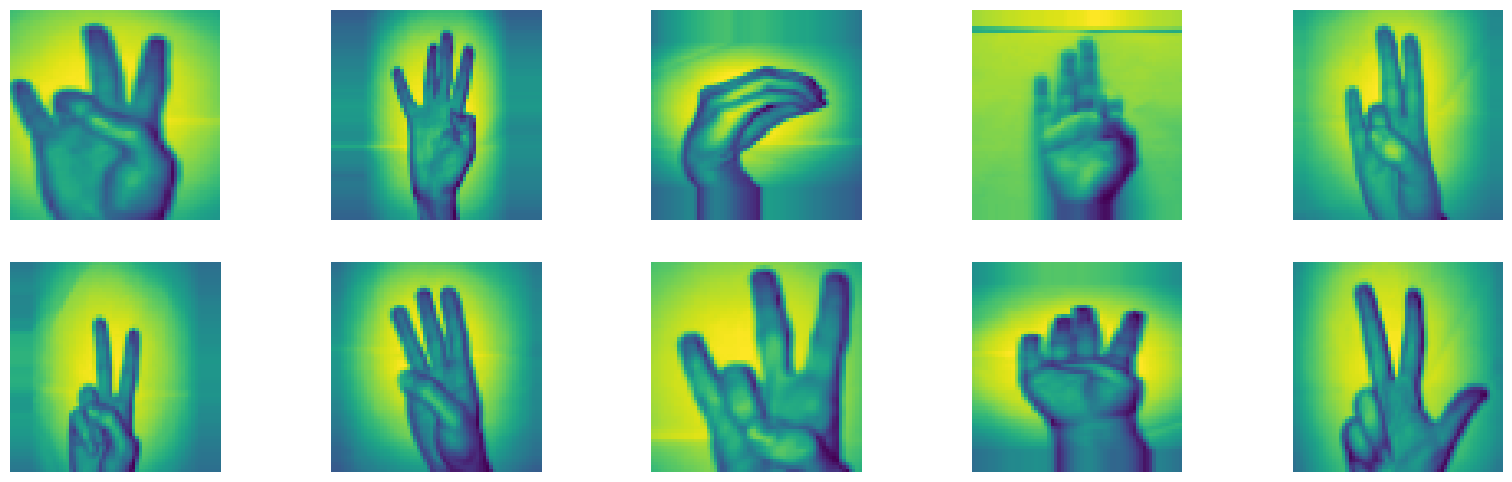

In [24]:
def show_new_samples(new_images):
    plt.figure(figsize=(20,6))
    for i in range(10):
        plt.subplot(2,5,i+1)
        image = new_images.next()
        plt.imshow(image[0].reshape(64,64))
        plt.axis('off')

    plt.show()
#Changin zoom level
datagen = ImageDataGenerator(zoom_range = 0.5)
new_images = datagen.flow(x_train,batch_size = 250)
show_new_samples(new_images)

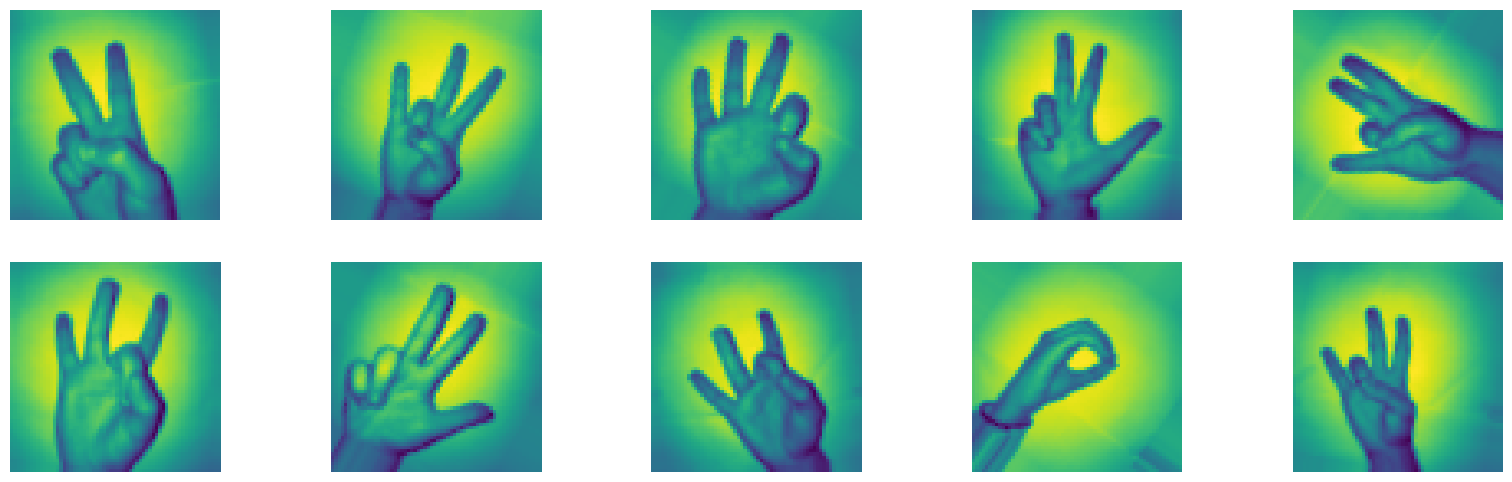

In [25]:
# Changing rotaion
datagen = ImageDataGenerator(rotation_range = 45)
new_images = datagen.flow(x_train,batch_size = 250)
show_new_samples(new_images)

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, MaxPool2D, Conv2D, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (9,9),padding = 'Same', activation ='relu', input_shape = (64,64,1)))
model.add(MaxPool2D(pool_size=(5,5)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (7,7),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(4,4), strides=(3,3)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128 , kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation='softmax'))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

datagen = ImageDataGenerator(zoom_range = 0.5,rotation_range = 45)
datagen.fit(x_train)

history = model.fit(datagen.flow(x_train,y_train, batch_size=250),epochs = 10, validation_data = (x_test,y_test))

Epoch 1/10
7/7 [==============================] - 18s 2s/step - loss: 2.3061 - accuracy: 0.1019 - val_loss: 2.3025 - val_accuracy: 0.1211
Epoch 2/10
7/7 [==============================] - 17s 2s/step - loss: 2.3025 - accuracy: 0.1049 - val_loss: 2.3035 - val_accuracy: 0.0775
Epoch 3/10
7/7 [==============================] - 17s 3s/step - loss: 2.3027 - accuracy: 0.0916 - val_loss: 2.3054 - val_accuracy: 0.0896
Epoch 4/10
7/7 [==============================] - 15s 2s/step - loss: 2.3016 - accuracy: 0.1031 - val_loss: 2.3050 - val_accuracy: 0.1186
Epoch 5/10
7/7 [==============================] - 15s 2s/step - loss: 2.3015 - accuracy: 0.1061 - val_loss: 2.3054 - val_accuracy: 0.0775
Epoch 6/10
7/7 [==============================] - 16s 2s/step - loss: 2.2993 - accuracy: 0.1140 - val_loss: 2.3010 - val_accuracy: 0.1501
Epoch 7/10
7/7 [==============================] - 15s 2s/step - loss: 2.2955 - accuracy: 0.1449 - val_loss: 2.2897 - val_accuracy: 0.2010
Epoch 8/10
7/7 [==================

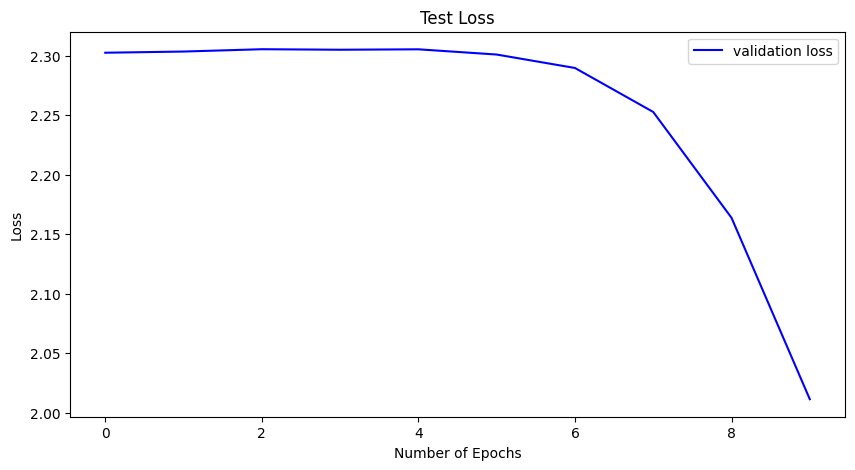

In [31]:
plt.figure(figsize = (10,5))
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

13/13 [==============================] - 1s 63ms/step


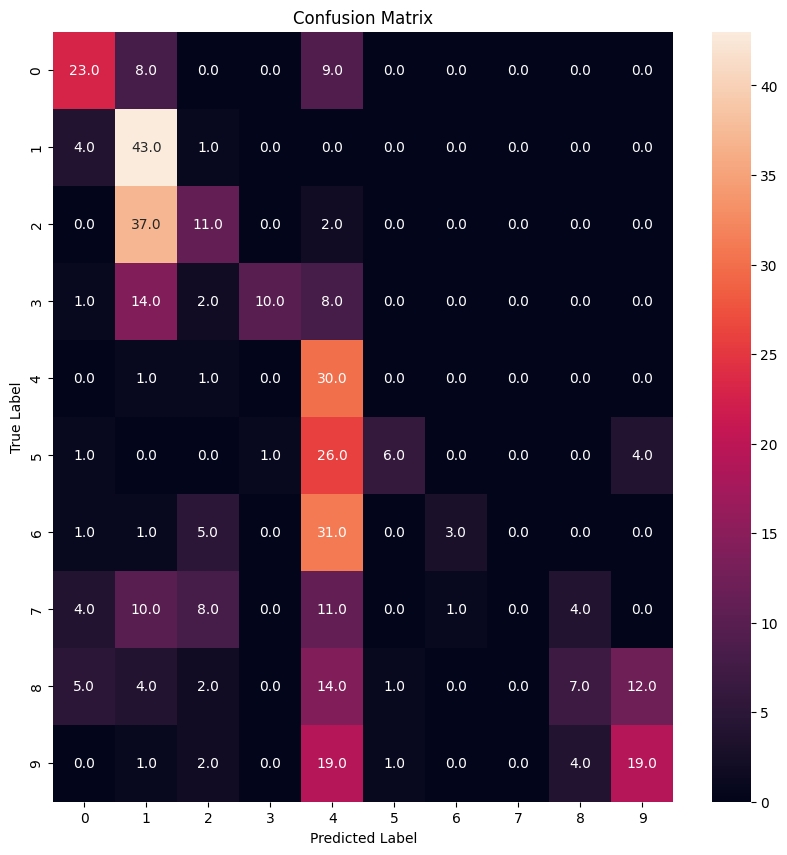

In [32]:
y_predict = model.predict(x_test)
y_predict_classes = np.argmax(y_predict,axis = 1)
y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(y_true, y_predict_classes)
plt.figure(figsize = (10,10))
sns.heatmap(confusion_mtx, annot=True,fmt= '.1f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()